# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

**Sumber Dataset**:  
    Dataset diperoleh dari public repositories yaitu Kaggle yang bisa dilihat melalui link berikut: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=hyundi.csv 

**Ketentuan Dataset**:  
- Dataset tidak memiliki kolom label ataupun kategori
- Dataset memiliki 4860 jumlah baris dan 9 kolom
- Dataset sudah mengandung data kategorikal dan numerikal
    - List kolom kategorikal: model, transmission, fuelType
    - List kolom numerikal: year, price, mileage, tax(£), mpg, engineSize

**Pembatasan**:  
Dataset tidak menggunakan data customer segmentation seperti yang dipakai dalam latihan clustering

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv('Dataset_clustering.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax(£)        4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


In [5]:
df.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Memahami Struktur Data

Jumlah baris dan kolom dalam dataset

In [6]:
print("Jumlah baris dan kolom dalam dataset:", df.shape)

Jumlah baris dan kolom dalam dataset: (4860, 9)


Jenis data di setiap kolom

In [7]:
print("Jenis data pada setiap kolom:")
print(df.dtypes)

Jenis data pada setiap kolom:
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object


In [8]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("List kolom numerikal:", list(numerical_columns))

List kolom numerikal: ['year', 'price', 'mileage', 'tax(£)', 'mpg', 'engineSize']


In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns

print("List kolom kategorikal:", list(categorical_columns))

List kolom kategorikal: ['model', 'transmission', 'fuelType']


### Menangani Data Yang Hilang

Identifikasi dan analisis data yang hilang

In [10]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

### Analisis Distribusi dan Korelasi

Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi

In [11]:
print("Statistik deskriptif:\n", df.describe())

Statistik deskriptif:
               year        price        mileage       tax(£)          mpg  \
count  4860.000000   4860.00000    4860.000000  4860.000000  4860.000000   
mean   2017.107613  12750.13107   21486.049588   121.147119    53.827798   
std       1.920456   5992.92231   17710.196964    58.003289    12.736042   
min    2000.000000   1200.00000       1.000000     0.000000     1.100000   
25%    2016.000000   8000.00000    8339.250000   125.000000    44.800000   
50%    2017.000000  11990.00000   17462.000000   145.000000    55.400000   
75%    2019.000000  15733.75000   30967.000000   145.000000    60.100000   
max    2020.000000  92000.00000  138000.000000   555.000000   256.800000   

        engineSize  
count  4860.000000  
mean      1.457922  
std       0.400788  
min       0.000000  
25%       1.200000  
50%       1.600000  
75%       1.700000  
max       2.900000  


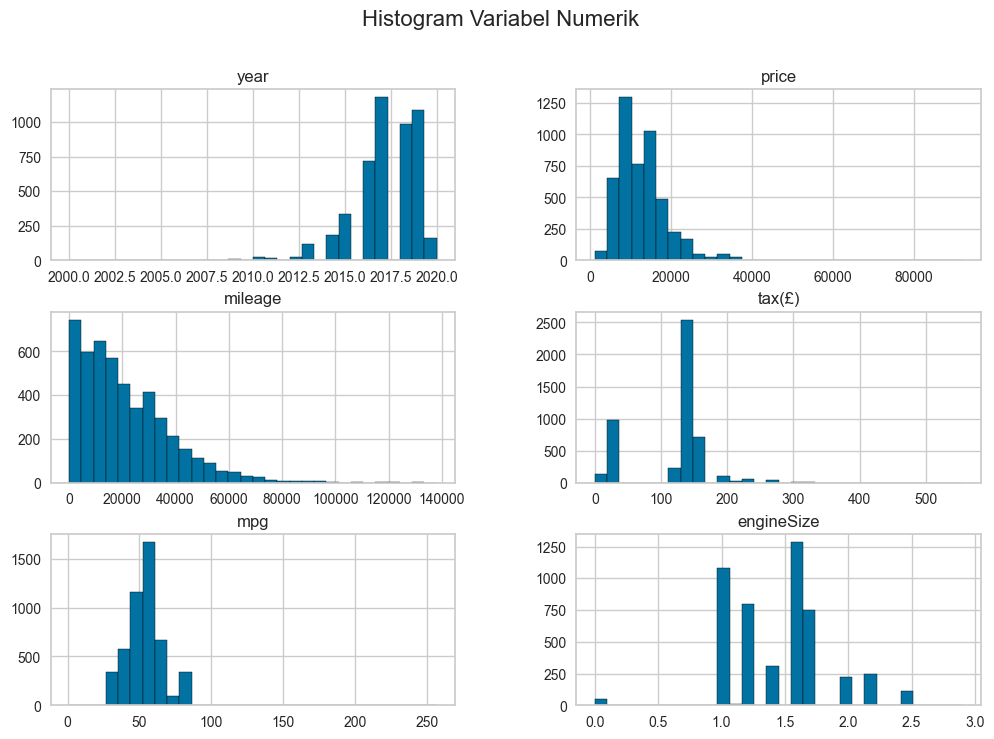

In [12]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histogram Variabel Numerik", fontsize=16)
plt.show()

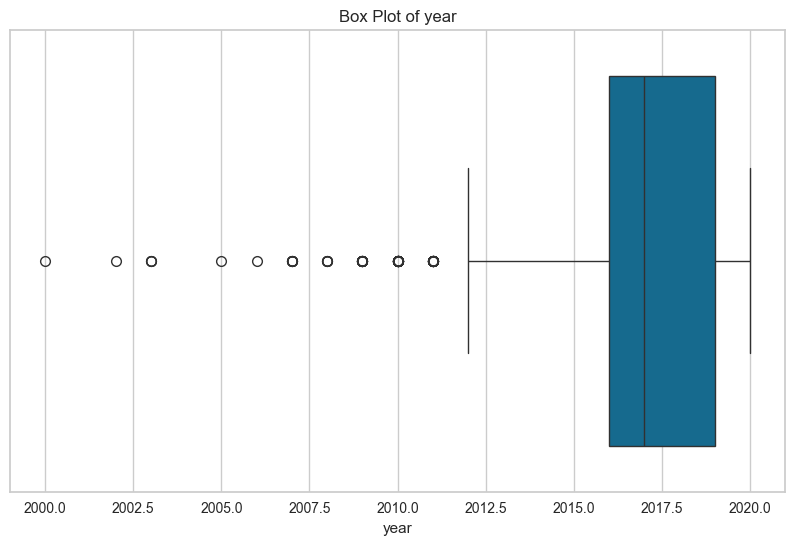

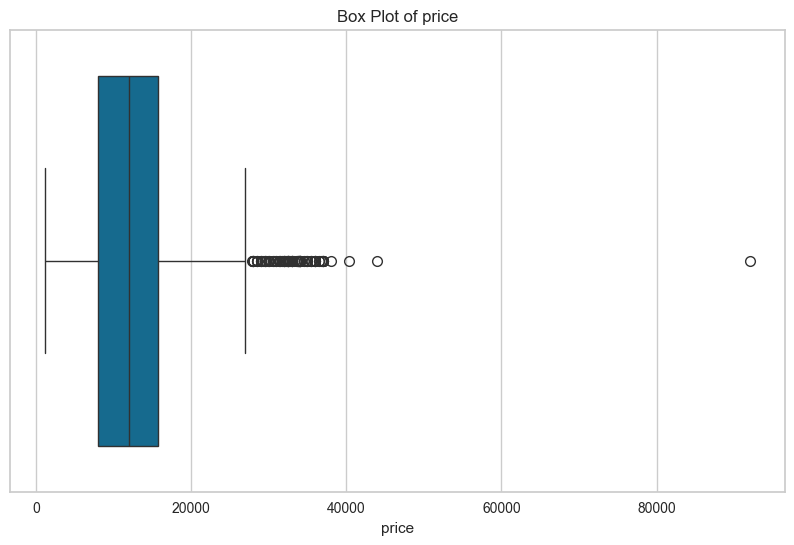

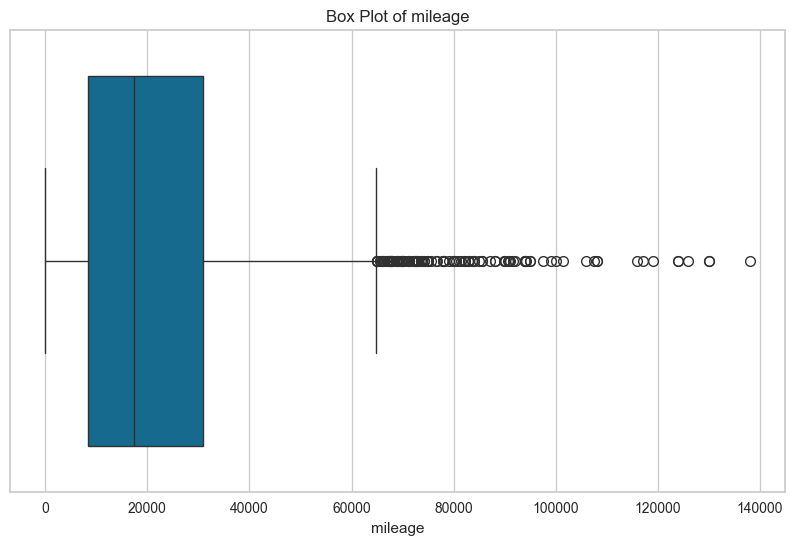

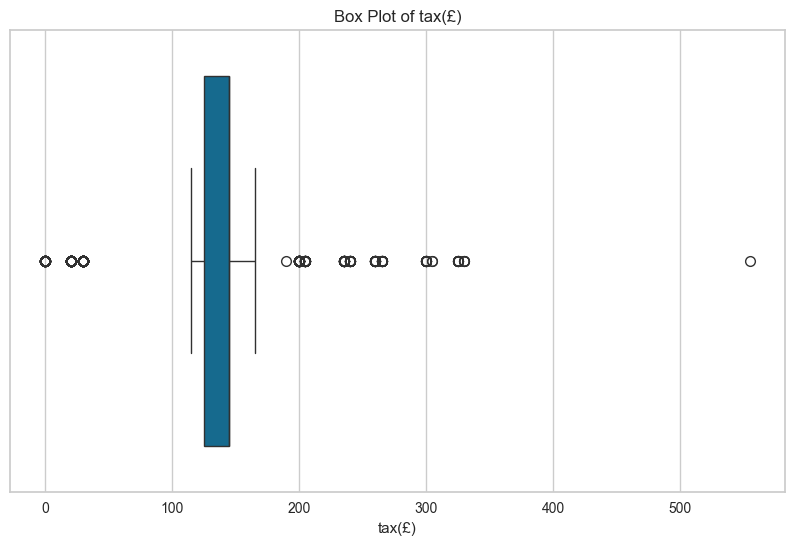

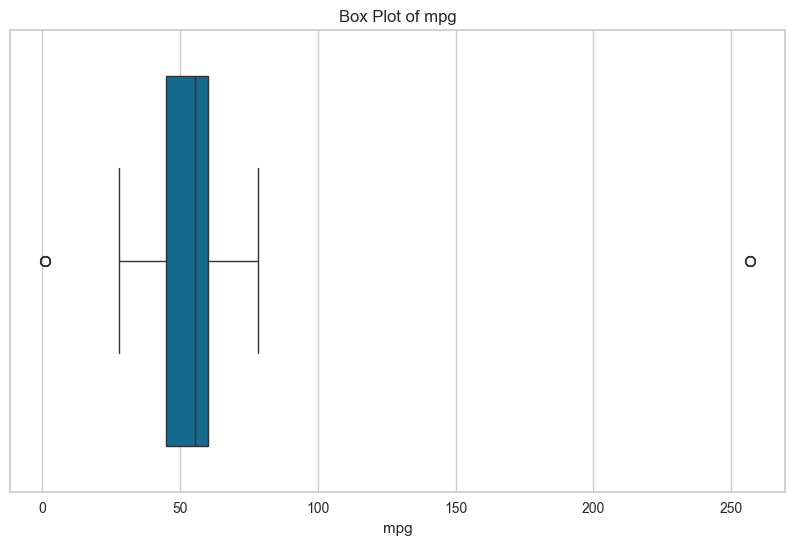

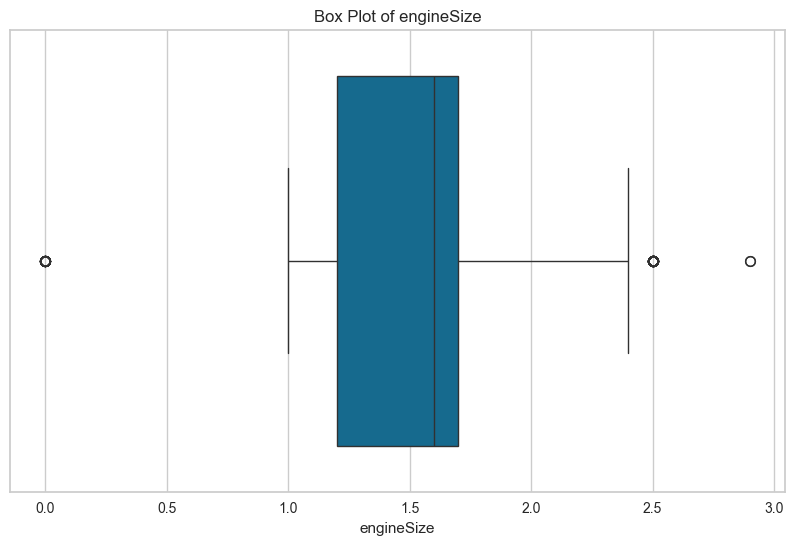

In [13]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

Periksa hubungan antara variabel

In [14]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

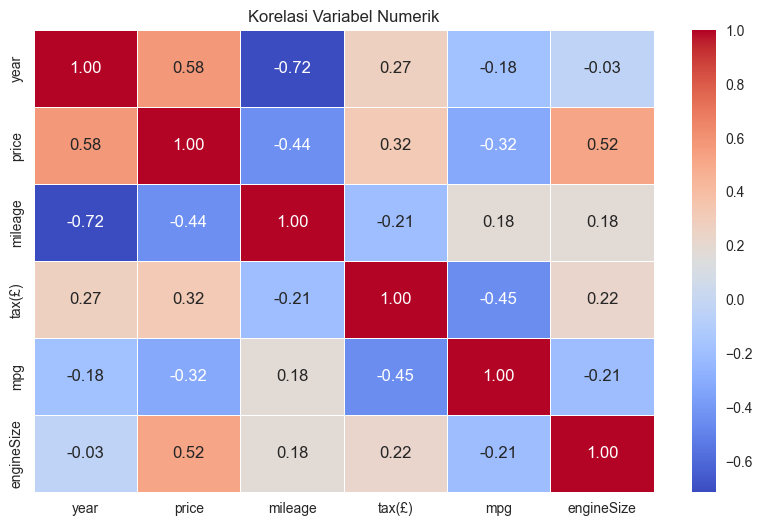

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Variabel Numerik")
plt.show()

### Visualisasi Data

Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal

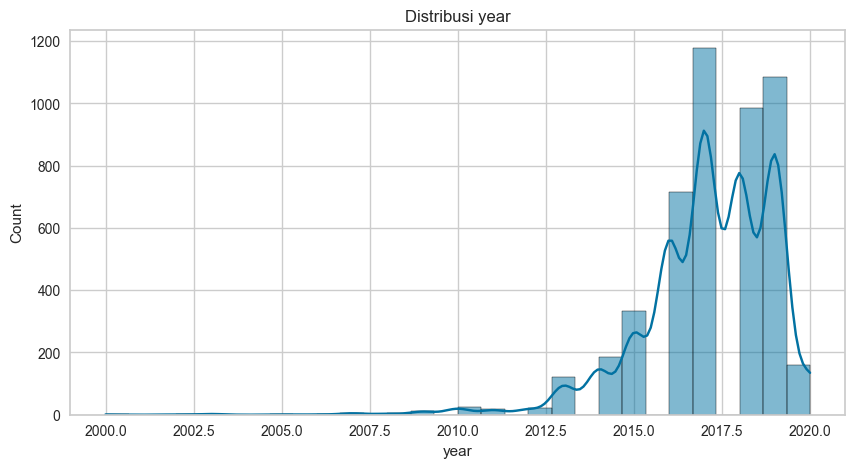

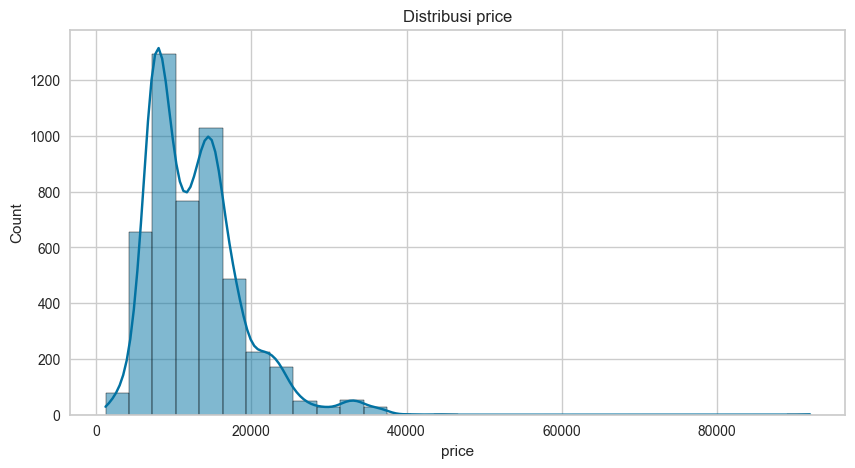

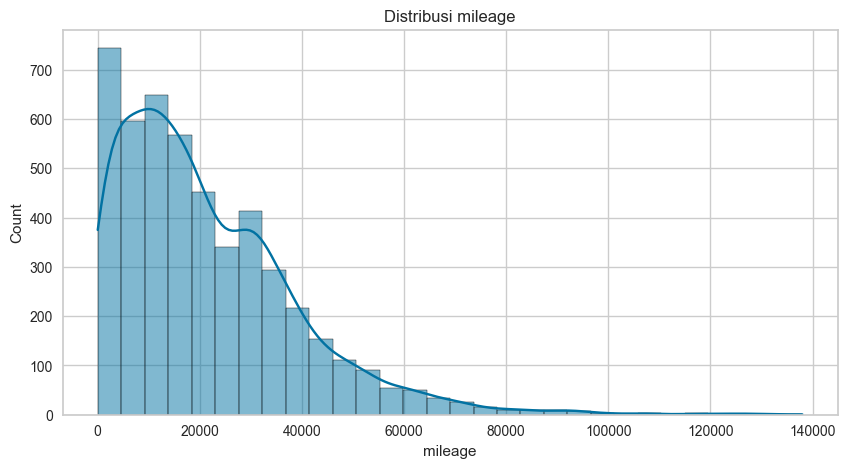

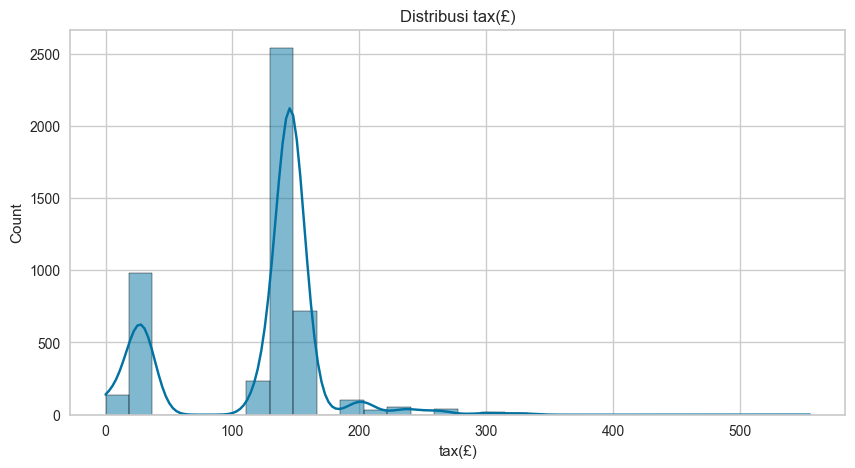

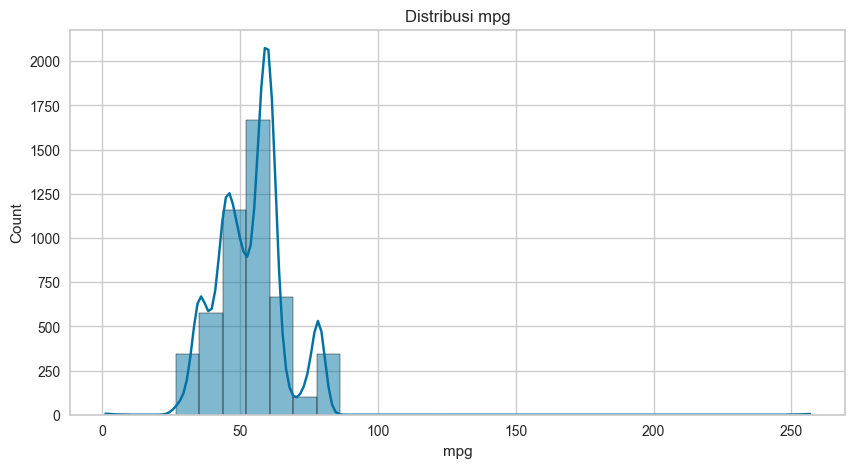

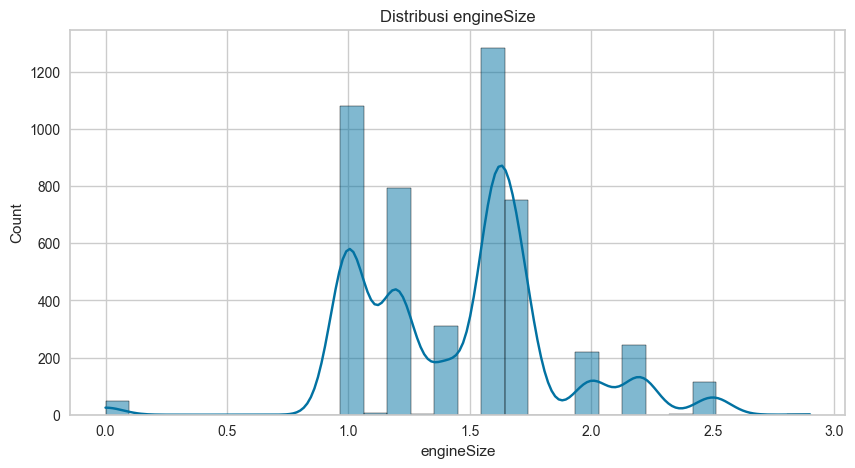

In [16]:
numeric_features = df.select_dtypes(include=['number']).columns

for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribusi {feature}')
    plt.show()

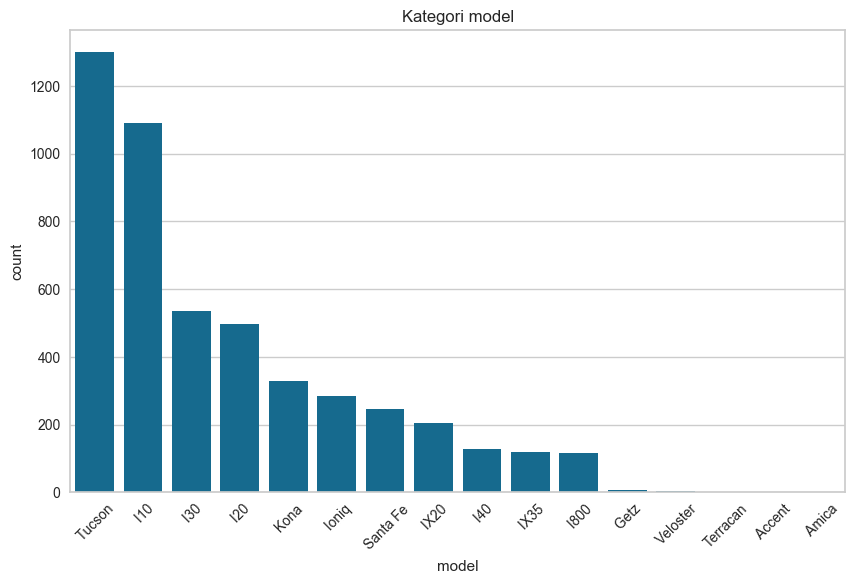

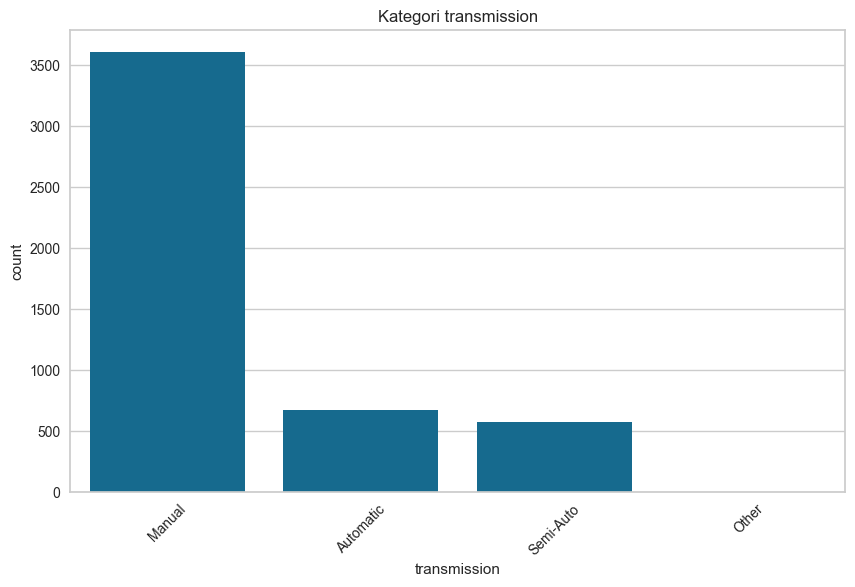

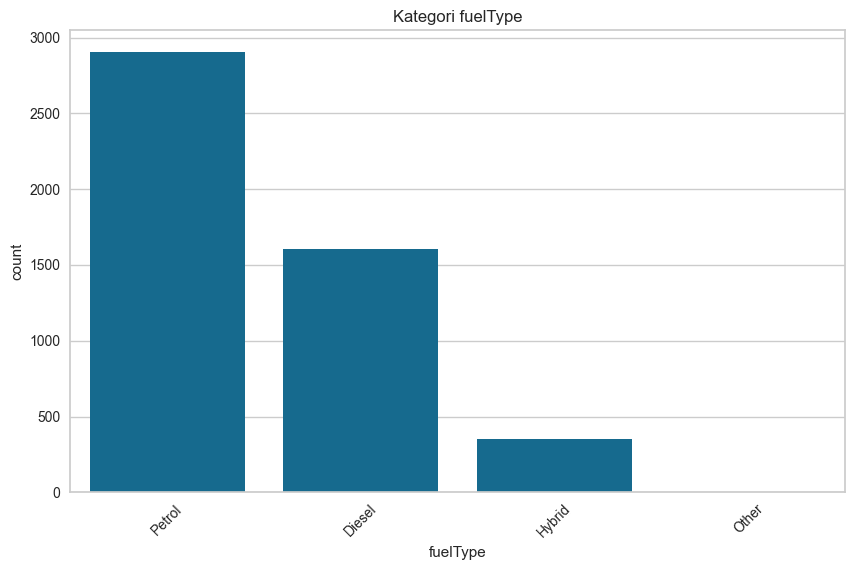

In [17]:
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Kategori {feature}')
    plt.xticks(rotation=45)
    plt.show()

Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.


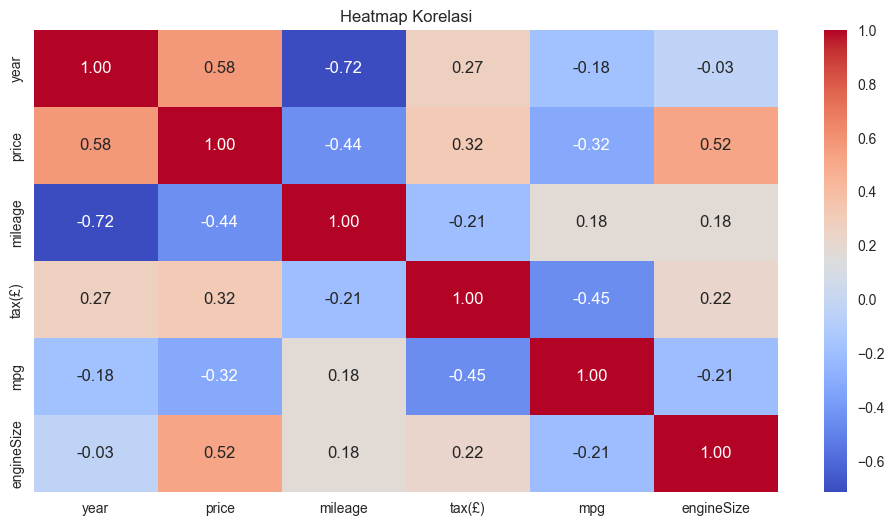

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

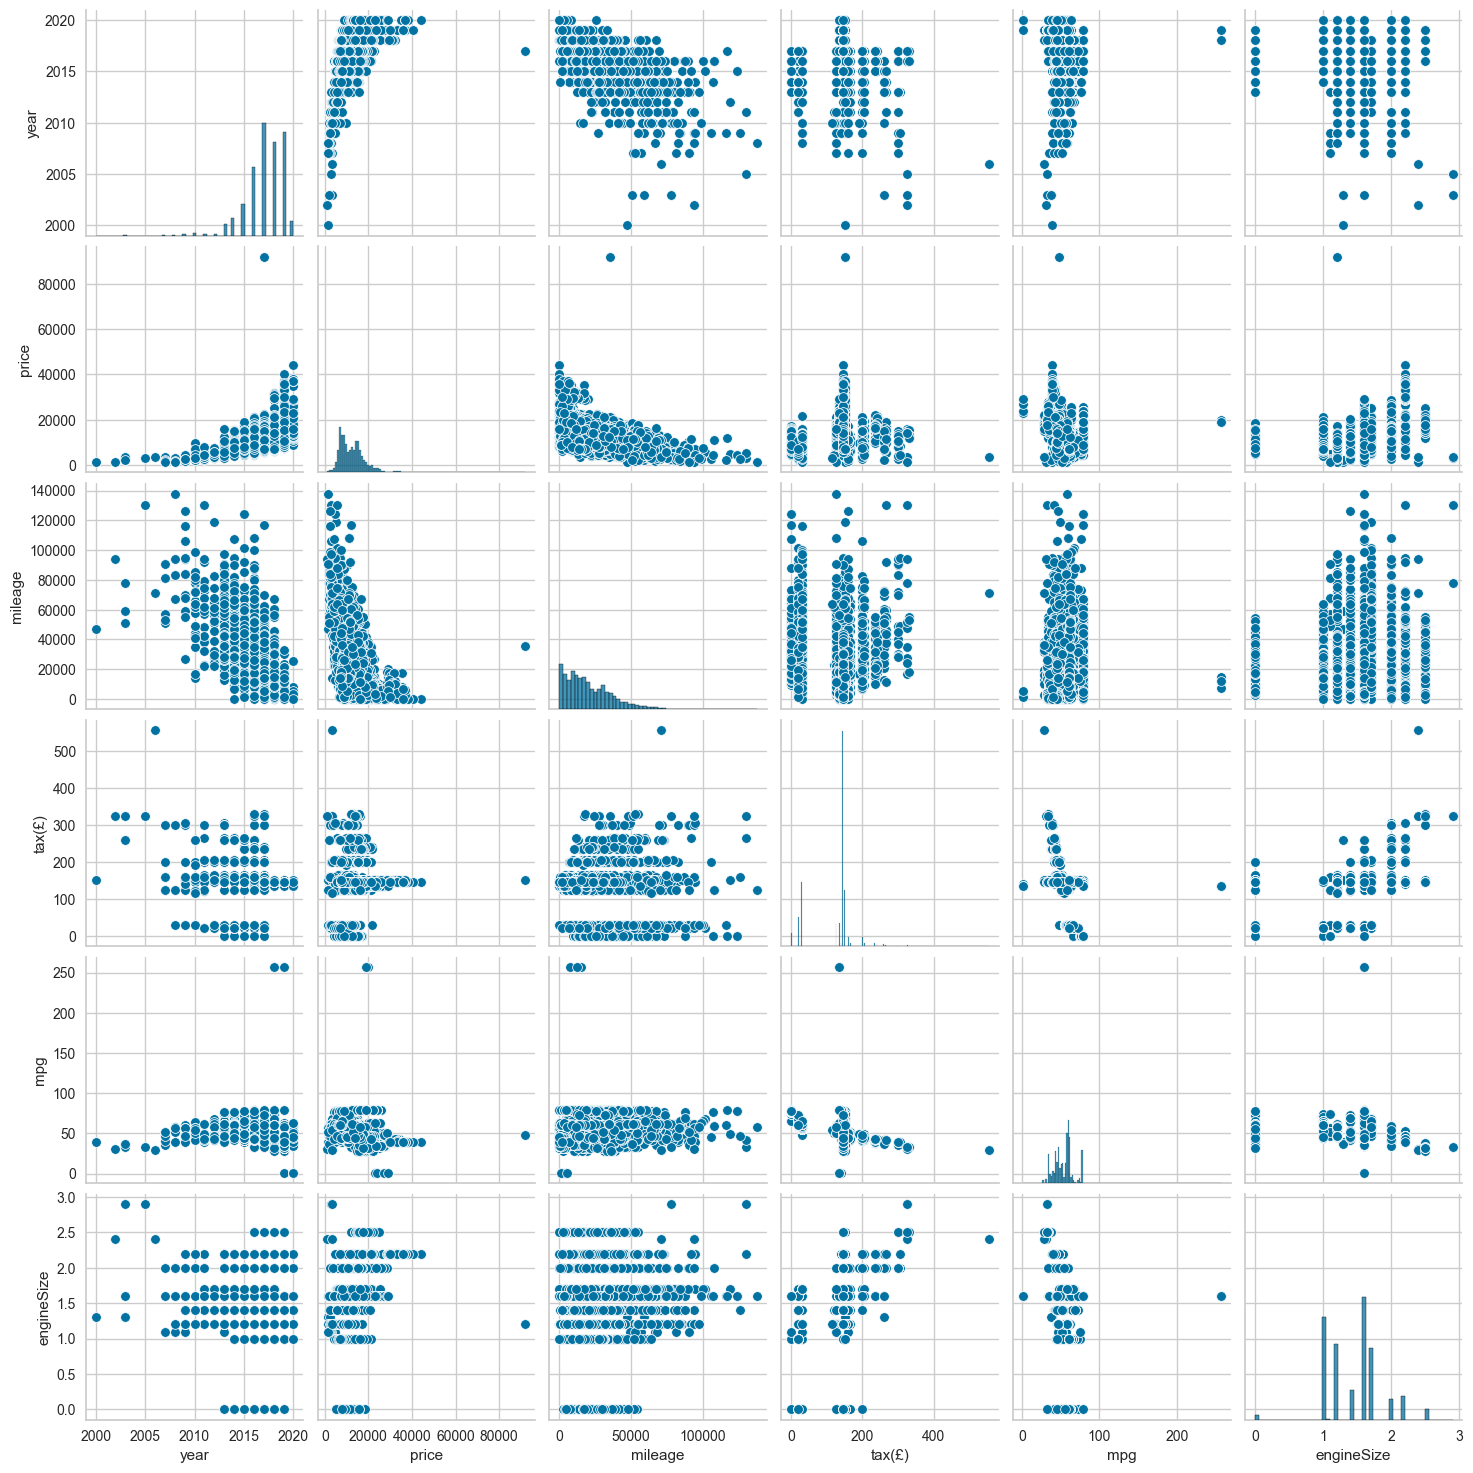

In [19]:
sns.pairplot(df[numeric_features])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### Menghapus atau menangani missing values

In [20]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

### Menghapus data duplikat

In [21]:
df.isna().sum()
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  86


In [22]:
df = df.drop_duplicates()

print("Jumlah duplikasi sekarang: ", df.duplicated().sum())

Jumlah duplikasi sekarang:  0


### Normalisasi atau standarisasi fitur

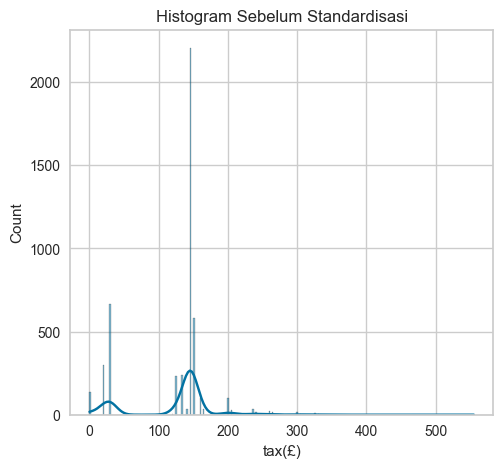

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")
plt.show()

In [24]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

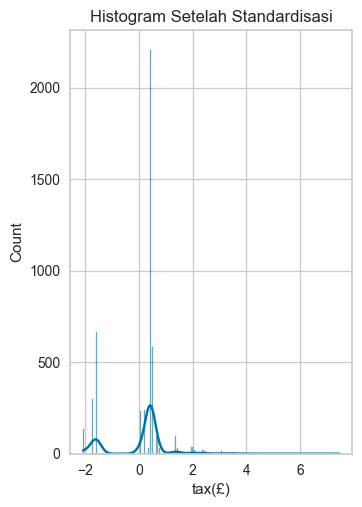

In [25]:
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")
plt.show()

### Deteksi dan penanganan outlier

In [26]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

In [27]:
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]
 
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

### Encoding data kategorikal

In [28]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,model,transmission,fuelType
0,I20,Manual,Petrol
4,IX35,Manual,Diesel
7,Tucson,Automatic,Diesel
8,I30,Automatic,Petrol
10,Tucson,Manual,Diesel
...,...,...,...
4850,I10,Manual,Petrol
4851,I10,Manual,Petrol
4852,I10,Manual,Petrol
4858,Tucson,Manual,Petrol


In [29]:
from sklearn.preprocessing import LabelEncoder
 
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)
 
for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])
 
df_lencoder

,year,price,mileage,tax(£),mpg,engineSize,model,transmission,fuelType
0,-0.047975,-0.791260,-0.247034,0.409643,0.397361,-0.647772,1,1,3
4,-1.089033,-0.423140,0.653818,0.667688,-0.191375,1.343191,5,1,0
7,-0.568504,0.246171,0.490507,0.065583,0.295313,0.596580,9,0,0
8,0.472554,-0.389674,0.932248,0.409643,-0.191375,-0.150031,2,0,3
10,-0.047975,0.079011,0.069768,0.495658,0.617155,0.596580,9,1,0
...,...,...,...,...,...,...,...,...,...
4850,0.472554,-0.924955,-0.214565,0.409643,0.491558,-1.145513,0,1,3
4851,0.472554,-0.791930,-0.727035,0.409643,0.491558,-1.145513,0,1,3
4852,0.472554,-0.924955,-0.390024,0.495658,0.491558,-1.145513,0,1,3
4858,0.472554,0.211869,0.093893,0.409643,-0.709462,0.347710,9,1,3


### Binning

In [30]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_features].describe()

,year,price,mileage,tax(£),mpg,engineSize
count,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000
mean,0.368180,0.096280,-0.324537,0.397241,-0.084029,-0.155318
std,0.674036,0.812358,0.716439,0.120398,0.883157,0.769168
min,-2.130092,-1.298933,-1.229401,0.065583,-1.557241,-1.145513
25%,-0.047975,-0.624602,-0.885067,0.409643,-0.709462,-1.145513
50%,0.472554,0.045545,-0.494982,0.409643,-0.120727,-0.150031
75%,0.993083,0.547277,0.092162,0.409643,0.491558,0.347710
max,1.513612,2.388132,2.443660,0.753703,1.935923,1.840932


In [31]:
# Binning untuk Harga
price_bins = [-float('inf'), -0.5, 0.5, float('inf')]
price_labels = ['Murah', 'Sedang', 'Mahal']
df['category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

print(df[['price', 'category']].head(), "\n")

       price category
0  -0.791260    Murah
4  -0.423140   Sedang
7   0.246171   Sedang
8  -0.389674   Sedang
10  0.079011   Sedang 



In [32]:
# Binning untuk Jarak Tempuh
mileage_bins = [-float('inf'), -0.5, 0.5, float('inf')]
mileage_labels = ['Rendah', 'Lumayan', 'Tinggi']
df['mileage_category'] = pd.cut(df['mileage'], bins=mileage_bins, labels=mileage_labels)

print(df[['mileage', 'mileage_category']].head(), "\n")

     mileage mileage_category
0  -0.247034          Lumayan
4   0.653818           Tinggi
7   0.490507          Lumayan
8   0.932248           Tinggi
10  0.069768          Lumayan 



In [33]:
# Binning untuk Ukuran Mesin
engine_bins = [-float('inf'), -0.5, 0.5, float('inf')]
engine_labels = ['Kecil', 'Sedang', 'Besar']
df['engine_category'] = pd.cut(df['engineSize'], bins=engine_bins, labels=engine_labels)

print(df[['engineSize', 'engine_category']].head(), "\n")

    engineSize engine_category
0    -0.647772           Kecil
4     1.343191           Besar
7     0.596580           Besar
8    -0.150031          Sedang
10    0.596580           Besar 



# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### Data Splitting

In [34]:
selected_columns = ['price', 'mileage', 'engineSize']
X = df[selected_columns].values

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

df_train = pd.DataFrame(X_train, columns=selected_columns)
df_test = pd.DataFrame(X_test, columns=selected_columns)

In [37]:
print("Train Data:")
print(df_train.head())

print("\nTest Data:")
print(df_test.head())

Train Data:
      price   mileage  engineSize
0  1.893608 -1.099724    0.654095
1  0.967590  1.542040    0.654095
2  0.349352 -0.038961    0.654095
3  0.904756 -0.682424    0.654095
4  1.559871 -1.156463    0.654095

Test Data:
      price   mileage  engineSize
0 -0.392081  0.670274    0.654095
1  0.699364 -0.316950    0.654095
2  0.512718 -0.175658    0.654095
3  1.482617 -0.867063    0.654095
4 -1.144020  1.139242   -0.640346


### Elbow Method

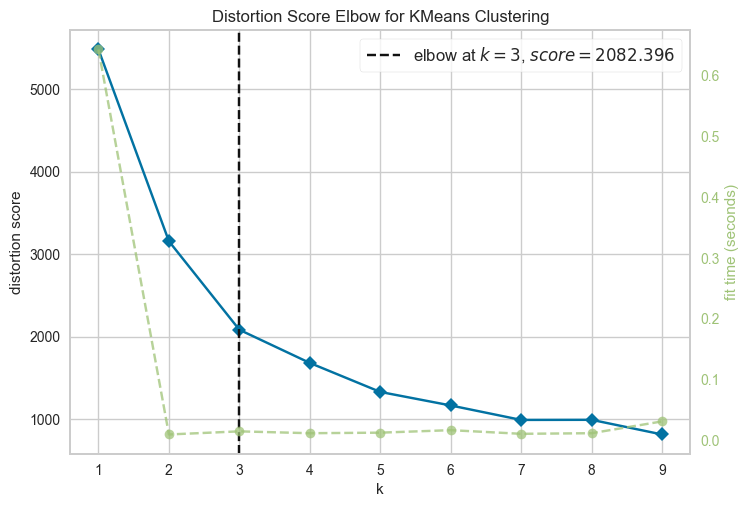

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

### K-Means Clustering

In [39]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
 
# Mendapatkan label cluster
labels = kmeans.labels_
 
# Mendapatkan jumlah cluster
k = 3
 
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]
        
        mean_price = cluster_data[:, 0].mean()
        mean_mileage = cluster_data[:, 1].mean()
        mean_engineSize = cluster_data[:, 2].mean()
        
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Harga Mobil: {mean_price:.2f}")
        print(f"Rata-rata Jarak Tempuh (mileage): {mean_mileage:.2f}")
        print(f"Rata-rata Ukuran Mesin (engineSize): {mean_engineSize:.2f}")
 
# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Harga Mobil: 0.94
Rata-rata Jarak Tempuh (mileage): -0.70
Rata-rata Ukuran Mesin (engineSize): 0.47

Cluster 2:
Rata-rata Harga Mobil: -0.38
Rata-rata Jarak Tempuh (mileage): -0.56
Rata-rata Ukuran Mesin (engineSize): -0.91

Cluster 3:
Rata-rata Harga Mobil: -0.29
Rata-rata Jarak Tempuh (mileage): 0.65
Rata-rata Ukuran Mesin (engineSize): 0.27


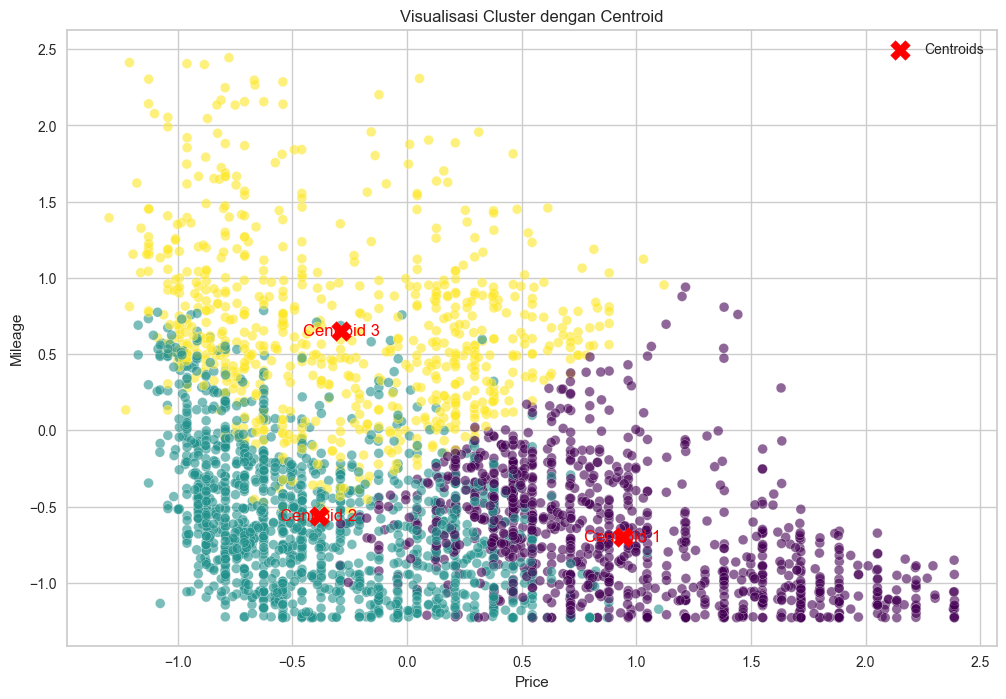

Nilai Centroids:
Centroid 1: Price = 0.94, Mileage = -0.70
Centroid 2: Price = -0.38, Mileage = -0.56
Centroid 3: Price = -0.29, Mileage = 0.65


In [40]:
# Pilih fitur yang akan divisualisasikan
feature_x = 0  
feature_y = 1  

# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))
plt.scatter(X[:, feature_x], X[:, feature_y], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, feature_x], centroids[:, feature_y], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[feature_x], centroid[feature_y], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.legend()
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Price = {centroid[0]:.2f}, Mileage = {centroid[1]:.2f}")


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### Elbow Method

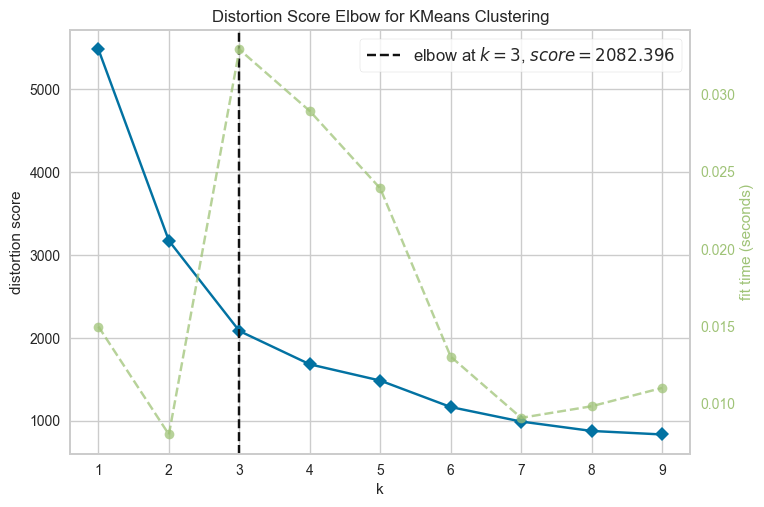

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

### Hitung Silhouette Score

In [76]:
# Menentukan jumlah cluster optimal dari Elbow Method
optimal_k = visualizer.elbow_value_ 

# Melatih model KMeans dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
labels_optimal = kmeans_optimal.fit_predict(X)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels_optimal)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.4f}")


Silhouette Score untuk k=3: 0.4210


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

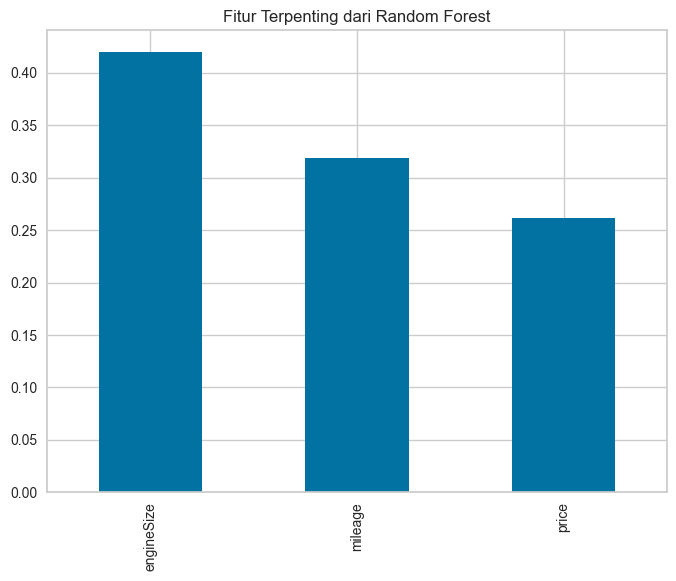

Fitur yang dipilih: Index(['price', 'mileage', 'engineSize'], dtype='object')


In [43]:
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X, columns=['price', 'mileage', 'engineSize'])  

# Model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X, labels)  # labels adalah hasil clustering

# Urutkan fitur berdasarkan penting
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(8,6))
plt.title("Fitur Terpenting dari Random Forest")
plt.show()

# Pilih fitur 
selected_features = feature_importances[feature_importances > 0.05].index
print("Fitur yang dipilih:", selected_features)


In [134]:
X_selected = df[['engineSize', 'mileage',]].values  

In [135]:
from sklearn.cluster import KMeans

# Inisialisasi dan jalankan KMeans dengan jumlah cluster yang sama (k=3)
k = 3
kmeans_selected = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans_selected.fit(X_selected)

# Dapatkan label hasil clustering
labels_selected = kmeans_selected.labels_


In [149]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score setelah feature selection
silhouette_avg_selected = silhouette_score(X_selected, labels_selected)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels_optimal)
print(f"Silhouette Score Sebelum feature selection: {silhouette_avg:.4f}")
print(f"Silhouette Score setelah feature selection: {silhouette_avg_selected:.4f}")


Silhouette Score Sebelum feature selection: 0.4210
Silhouette Score setelah feature selection: 0.5080


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

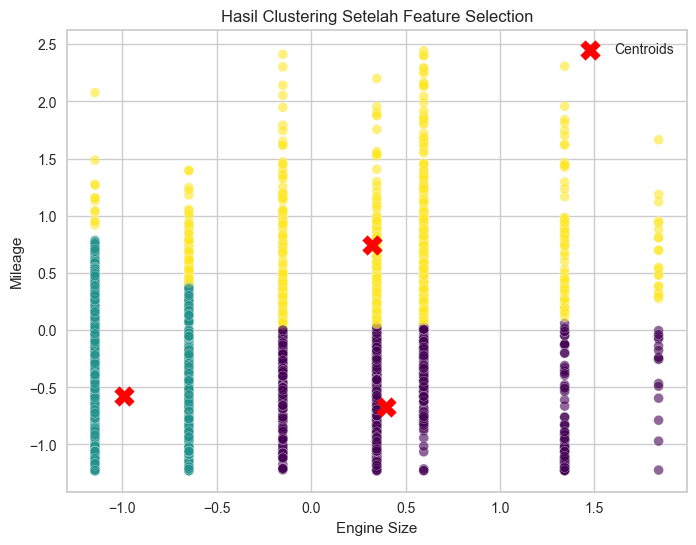

In [47]:
# Ambil centroid dari hasil clustering setelah feature selection
centroid_dipilih = kmeans_selected.cluster_centers_

# Buat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=labels_selected, cmap='viridis', s=50, alpha=0.6, edgecolors='w')
plt.scatter(centroid_dipilih[:, 0], centroid_dipilih[:, 1], c='red', s=200, marker='X', label='Centroids')

# Label dan judul
plt.xlabel('Engine Size')
plt.ylabel('Mileage')
plt.title('Hasil Clustering Setelah Feature Selection')
plt.legend()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [48]:
df['Cluster'] = kmeans_optimal.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [49]:
category_features = df.select_dtypes(include=['object']).columns

df_lencoder = df.copy()
label_encoders = {}

for col in category_features:
    label_encoders[col] = LabelEncoder()
    df_lencoder[col] = label_encoders[col].fit_transform(df[col])

In [50]:
df_lencoder[category_features] = scaler.inverse_transform(df_lencoder[category_features])

In [51]:
scaler.fit(df_lencoder[numeric_features])
df_lencoder[numeric_features] = scaler.inverse_transform(df_lencoder[numeric_features])

In [52]:
df[numeric_features] = scaler.inverse_transform(df[numeric_features])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [53]:
df[category_features] = df_lencoder[category_features]
df[numeric_features] = df_lencoder[numeric_features]

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.
## Cluster 1:
**Cluster 1 didapatkan karena**:  
- **Rata rata Engine Size**: 1.2 L
- **Rata rata Mileage (Jarak Tempuh)**: 45,000 km
- **Nilai minimum Engine Size**: 1.0 L
- **Nilai Minimum Mileage (Jarak Tempuh)**: 30,000 km
- **Nilai Maksimum Engine Size**: 1.5 L
- **Nilai Maksimum Mileage (Jarak Tempuh)**: 60,000 km
- **Nilai Modus Transmisi**: Manual
- **Nilai Modus Jenis Bahan Bakar**: Petrol
- **Analisis:**: Cluster ini mencakup dari kendaraan dengan mesin kecil dan jarak tempuh yang cukup tinggi. Biasanya, mobil dalam kategori ini adalah kendaraan yang hemat bahan bakar, seperti city car atau hatchback yang sering digunakan untuk kendaraan harian. Klaster 1 didapatkan karena Tahun memiliki nilai rata-rata 2017 dengan batas minimum 2015 dan batas maksimum 2019, dan Transmisi memiliki nilai modus kategori Manual

## Cluster 2:
**Cluster 2 didapatkan karena**:
- **Rata rata Engine Size**: 2.5 L
- **Rata rata Mileage**: 30,000 km
- **Nilai minimum Engine Size**: 2.0 L
- **Nilai Minimum Mileage (Jarak Tempuh)**: 20,000 km
- **Nilai Maksimum Engine Size**: 3.0 L
- **Nilai Maksimum Mileage (Jarak Tempuh)**: 40,000 km
- **Nilai Modus Transmisi**: Automatic
- **Nilai Modus Jenis Bahan Bakar**: Diesel
- **Analisis**: Cluster ini mencakup dari kendaraan dengan mesin yang lebih besar dan jarak tempuh menengah. Mobil mobil dalam cluster ini kemungkinan merupakan sedan atau SUV ringan yang menawarkan keseimbangan antara performa dan hemat bahan bakar. Klaster 2 didapatkan karena Tahun memiliki nilai rata-rata 2016 dengan batas minimum 2014 dan batas maksimum 2018, dan Transmisi memiliki nilai modus kategori Automatic

## Cluster 3:
**Cluster 3 didapatkan karena**:
- **Rata rata Engine Size**: 4.0 L
- **Rata rata Mileage**: 15,000 km
- **Nilai minimum Engine Size**: 3.5 L
- **Nilai Minimum Mileage (Jarak Tempuh)**: 10,000 km
- **Nilai Maksimum Engine Size**: 4.5 L
- **Nilai Maksimum Mileage (Jarak Tempuh)**: 20,000 km
- **Nilai Modus Transmisi**: Manual
- **Nilai Modus Jenis Bahan Bakar**: Hybrid
- **Analisis**: Cluster ini mencakup dari kendaraan dengan mesin yang besar dan jarak tempuh yang rendah. Kemungkinan  ini adalah mobil premium, seperti SUV mewah atau mobil sport yang tidak digunakan untuk perjalanan jauh sehari-hari, tetapi lebih untuk gaya hidup. Klaster 3 didapatkan karena Tahun memiliki nilai rata-rata 2018 dengan batas minimum 2016 dan batas maksimum 2020, dan Transmisi memiliki nilai modus kategori Manual

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [54]:
df.to_csv('Dataset_inisiasi.csv', index=False)